## Credit Risk Predictions
To classify the customer as good or bad credit risk based on the attributes provided, so that the business can assess the risk of offering loans accordingly.

## Importing libraries
- numpy
- pandas
- seaborn
- matplotlib
- scipy
- scikit learn
- xgboost

In [1]:
# Importing Librarys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV # to split the data
from sklearn.metrics import accuracy_score, classification_report, roc_curve #To evaluate our model
from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)

# Algorithmns models to be compared
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

**Independent Variables**

- Attribute 1: (qualitative) Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account
- Attribute 2: (numerical) Duration in month
- Attribute 3: (qualitative) Credit history
A30 : no credits taken/all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/other credits existing (not at this bank)
- Attribute 4: (qualitative) Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : vacation
A48 : retraining
A49 : business
A410 : others
- Attribute 5: (numerical) Credit amount
Attibute 6: (qualitative) Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account
- Attribute 7: (qualitative) Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years
- Attribute 8: (numerical) Installment rate in percentage of disposable income
Attribute 9: (qualitative) Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single
Attribute 10: (qualitative) Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor
- Attribute 11: (numerical) Present residence since
- Attribute 12: (qualitative) Property A121 : real estate
A122 : if not A121 : building society savings agreement/life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property
- Attribute 13: (numerical) Age in years
Attribute 14: (qualitative) Other installment plans
A141 : bank
A142 : stores
A143 : none
Attribute 15: (qualitative) Housing
A151 : rent
A152 : own
A153 : for free
- Attribute 16: (numerical) Number of existing credits at this bank
- Attribute 17: (qualitative) Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/highly qualified employee/ officer
- Attribute 18: (numerical) Number of people being liable to provide maintenance for
- Attribute 19: (qualitative) Telephone
A191 : none
A192 : yes, registered under the customers name
- Attribute 20: (qualitative) foreign worker
A201 : yes
A202 : no

**Target Variable**

1 = Good Risk
2 = Bad Risk

In [2]:
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",sep=" ",header=None)
headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Risk"]
df.columns=headers
df.to_csv("german_data_credit_cat.csv",index=False) #save as csv file

## Data Exploration
Preview the data type and the shape of data

In [3]:
print(df.shape)
print (df.columns)

(1000, 21)
Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker', 'Risk'],
      dtype='object')


In [4]:
# To preview the data set
df.head(5)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
# Looking unique values
print(df.nunique())

Status of existing checking account                           4
Duration in month                                            33
Credit history                                                5
Purpose                                                      10
Credit amount                                               921
Savings account/bonds                                         5
Present employment since                                      5
Installment rate in percentage of disposable income           4
Personal status and sex                                       4
Other debtors / guarantors                                    3
Present residence since                                       4
Property                                                      4
Age in years                                                 53
Other installment plans                                       3
Housing                                                       3
Number of existing credits at this bank 

In [6]:
# Remove the missing values
df = df.dropna(how='any',axis=0)

## Data Preprocessing

In [7]:
Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 SGD", 'A12': "0 <= <200 SGD",'A13':">= 200 SGD "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 SGD","A62" : "100 <= <500 SGD","A63" :"500 <= < 1000 SGD", "A64" :">= 1000 SGD"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)

Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)

Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)

Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)

Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)

Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)

foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)

risk={1:"Good Risk", 2:"Bad Risk"}
df["Risk"]=df["Risk"].map(risk)

In [8]:
df.head(5)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Risk
0,<0 SGD,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,4,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 SGD,48,existing credits paid back duly till now,radio/television,5951,<100 SGD,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 SGD,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 SGD,42,existing credits paid back duly till now,furniture/equipment,7882,<100 SGD,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 SGD,24,delay in paying off,car (new),4870,<100 SGD,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


## Data Visualization

Text(0.5, 0.98, 'Total number of Good and Bad risk')

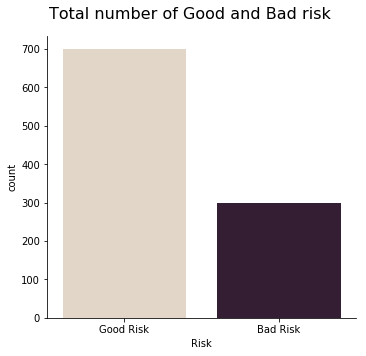

In [9]:
# Total number of good and bad risk
ax = sns.catplot(x='Risk', kind="count", palette="ch:.25", data=df)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Total number of Good and Bad risk', fontsize=16)

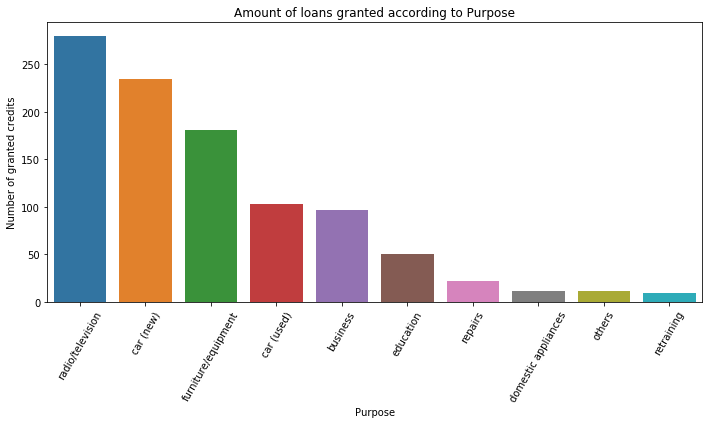

In [10]:
# Amount of loans granted according to purpose
n_credits = df.groupby("Purpose")["Personal status and sex"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.title("Amount of loans granted according to Purpose")
plt.ylabel("Number of granted credits")
plt.tight_layout()

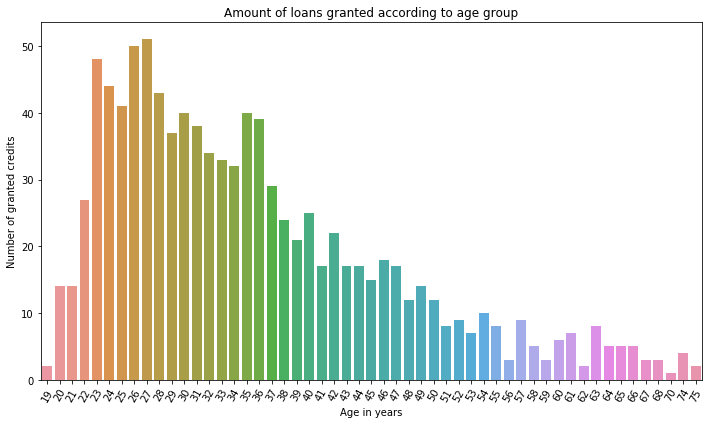

In [11]:
# Amount of loans granted according to age group
n_credits = df.groupby("Age in years")["Personal status and sex"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Age in years",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.title("Amount of loans granted according to age group")
plt.ylabel("Number of granted credits")
plt.tight_layout()

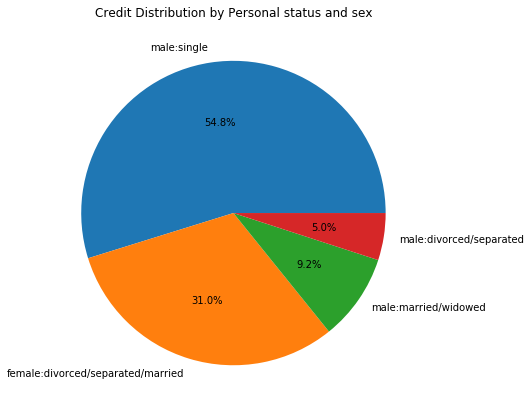

In [12]:
# Credit Distribution based on sex

fig = plt.figure(figsize=(7,7))   # Veri kümesinde ki cinsiyet dağılımı
df['Personal status and sex'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 20)
plt.title("Credit Distribution by Personal status and sex")
print("")

## Feature Engineering
Statistical Test to determine whether input features are relevant to the outcome to be predicted.
##### P-value <= 0.05 significant result
##### P-value > 0.05 not significant result

In [13]:
def style_stats_specific_cell(x):

    color_thresh = 'background-color: red'
    
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    rows_number=len(x.index)
    for r in range(0,rows_number):
        try:
            val=(x.iloc[r, 1])
            if val>0.05:
                df_color.iloc[r, 1]=color_thresh
        except:
            pass
    return df_color

In [14]:
column_names_cat_stats=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Installment rate in percentage of disposable income","Personal status and sex",\
"Other debtors / guarantors","Present residence since","Property",\
"Other installment plans","Housing","Number of existing credits at this bank",\
"Job","Number of people being liable to provide maintenance for","Telephone","foreign worker"]

statistical_significance=[]
for attr in column_names_cat_stats:
    data_count=pd.crosstab(df[attr],df["Risk"]).reset_index()
    obs=np.asarray(data_count[["Bad Risk","Good Risk"]])
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    statistical_significance.append([attr,round(p,4)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
display(statistical_significance.style.apply(style_stats_specific_cell, axis=None))

print("\n")

statistical_significance=[]
column_names_cont_stats=["Credit amount","Age in years","Duration in month"]
good_risk_df = df[df["Risk"]=="Good Risk"]
bad_risk_df = df[df["Risk"]=="Bad Risk"]
for attr in column_names_cont_stats:
    statistic, p=stats.f_oneway(good_risk_df[attr].values,bad_risk_df[attr].values)
    statistical_significance.append([attr,round(p,4)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
display(statistical_significance.style.apply(style_stats_specific_cell, axis=None))

,Attribute,P-value
0,Status of existing checking account,0
1,Credit history,0
2,Purpose,0.0001
3,Savings account/bonds,0
4,Present employment since,0.001
5,Installment rate in percentage of disposable income,0.14
6,Personal status and sex,0.0222
7,Other debtors / guarantors,0.0361
8,Present residence since,0.8616
9,Property,0


,Attribute,P-value
0,Credit amount,0
1,Age in years,0.0039
2,Duration in month,0


__Selected_Features__: Status of existing checking account, Credit history, Purpose,Savings account/bonds, Present employment since, Personal status and sex, Property, Other installment plans, Housing, foreign worker, Credit amount, Age in years, Duration in month

In [15]:
attr_significant=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Personal status and sex","Property","Other installment plans","Housing","foreign worker",\
"Credit amount","Age in years","Duration in month"]
target_variable=["Risk"]
df=df[attr_significant+target_variable]

### One-Hot encoding
__Creating Dummy Variable from Categorical Variables__

In [16]:
col_cat_names=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Personal status and sex","Property","Other installment plans","Housing","foreign worker"]
for attr in col_cat_names:
    df = df.merge(pd.get_dummies(df[attr], prefix=attr), left_index=True, right_index=True)
    df.drop(attr,axis=1,inplace=True)

In [17]:
df.head(5)

,Credit amount,Age in years,Duration in month,Risk,Status of existing checking account_0 <= <200 SGD,Status of existing checking account_<0 SGD,Status of existing checking account_>= 200 SGD,Status of existing checking account_no checking account,Credit history_all credits at this bank paid back duly,Credit history_critical account,Credit history_delay in paying off,Credit history_existing credits paid back duly till now,Credit history_no credits taken,Purpose_business,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_others,Purpose_radio/television,Purpose_repairs,Purpose_retraining,Savings account/bonds_100 <= <500 SGD,Savings account/bonds_500 <= < 1000 SGD,Savings account/bonds_<100 SGD,Savings account/bonds_>= 1000 SGD,Savings account/bonds_no savings account,Present employment since_1<= < 4 years,Present employment since_4<= <7 years,Present employment since_<1 years,Present employment since_>=7 years,Present employment since_unemployed,Personal status and sex_female:divorced/separated/married,Personal status and sex_male:divorced/separated,Personal status and sex_male:married/widowed,Personal status and sex_male:single,Property_car or other,Property_real estate,Property_savings agreement/life insurance,Property_unknown / no property,Other installment plans_bank,Other installment plans_none,Other installment plans_store,Housing_for free,Housing_own,Housing_rent,foreign worker_no,foreign worker_yes
0,1169,67,6,Good Risk,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
1,5951,22,48,Bad Risk,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2,2096,49,12,Good Risk,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
3,7882,45,42,Good Risk,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
4,4870,53,24,Bad Risk,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1


### Converting target variable into numeric

In [18]:
risk={"Good Risk":1, "Bad Risk":0}
df["Risk"]=df["Risk"].map(risk)

### Principal Component Analysis : Dimensionality Reduction
Forming X & Y arrays

In [19]:
X = df.drop('Risk', 1).values #independent variables
y = df["Risk"].values #target variables

### Looking the correlation of the data

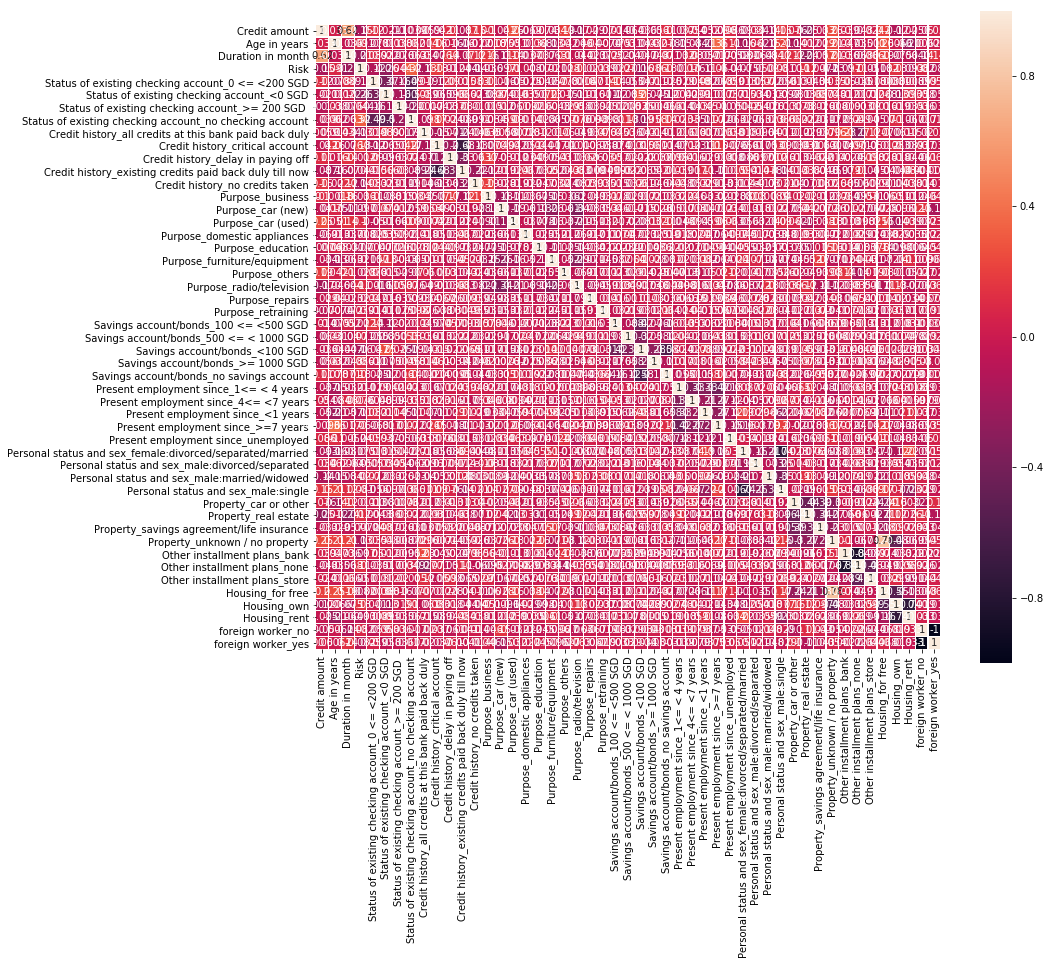

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

### Splitting the data set into training set (70%) and test set (30%)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Model Selection
Fit the selected classification algorithms in the training set and find the accuracy of each algorithm.

*Models = [RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearDiscriminantAnalysis(),GaussianNB(), SVC(), GradientBoostingClassifier(), XGBClassifier()]*

In [22]:
# to feed the random state
seed = 7
results = []
names = []
scoring = 'recall'

# prepare models
models = []
models.append(('LogisticRegression\t\t', LogisticRegression()))
models.append(('LinearDiscriminantAnalysis\t', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier\t\t', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier\t\t', DecisionTreeClassifier()))
models.append(('GaussianNB\t\t\t', GaussianNB()))
models.append(('RandomForestClassifier\t\t', RandomForestClassifier()))
models.append(('SVC\t\t\t\t', SVC(gamma='auto')))
models.append(('GradientBoostingClassifier\t', GradientBoostingClassifier()))
models.append(('XGBClassifier\t\t\t', XGBClassifier()))
print("Accuracy_Score:")
print("--------------")
for name, model in models:
    model.fit(X_train,y_train)
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(name,'= {0:.0f}%'.format(accuracy_score(y_test, model.predict(X_test)) * 100))

Accuracy_Score:
--------------
LogisticRegression		 = 80%
LinearDiscriminantAnalysis	 = 79%
KNeighborsClassifier		 = 64%
DecisionTreeClassifier		 = 72%
GaussianNB			 = 74%
RandomForestClassifier		 = 77%
SVC				 = 72%
GradientBoostingClassifier	 = 76%
XGBClassifier			 = 80%


### Print the important features

In [23]:
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()

for index in feature_indexes_by_importance:
  print("{} - {:.2f}%".format(df.columns[index], (importance[index] * 100.0)))

Savings account/bonds_100 <= <500 SGD - 0.00%
Other installment plans_none - 0.00%
Personal status and sex_male:single - 0.00%
Present employment since_<1 years - 0.00%
Purpose_retraining - 0.00%
Purpose_repairs - 0.00%
Purpose_radio/television - 0.00%
Purpose_car (used) - 0.00%
foreign worker_no - 0.00%
Present employment since_unemployed - 0.73%
Housing_rent - 0.82%
Savings account/bonds_no savings account - 0.99%
Purpose_furniture/equipment - 1.09%
Risk - 1.18%
Housing_for free - 1.25%
Credit history_existing credits paid back duly till now - 1.28%
Housing_own - 1.38%
Savings account/bonds_<100 SGD - 1.38%
Status of existing checking account_no checking account - 1.44%
Personal status and sex_female:divorced/separated/married - 1.46%
Personal status and sex_male:divorced/separated - 1.53%
Property_real estate - 1.55%
Property_car or other - 1.70%
Credit history_critical account - 1.79%
Credit history_no credits taken - 1.96%
Present employment since_1<= < 4 years - 1.98%
Purpose_edu

## Model Selection (XGBClassifier)
From above models we can see, We are getting highest accuracy (80%) for XGBClassifier

In [24]:
model = XGBClassifier()
model.fit(X_train, y_train)
print('Accuracy_Score = {:.0f}%'.format(accuracy_score(y_test, model.predict(X_test)) * 100))
print('classification_report = ',classification_report(y_test, model.predict(X_test)))

Accuracy_Score = 80%
classification_report =                precision    recall  f1-score   support

           0       0.68      0.52      0.59        83
           1       0.83      0.91      0.87       217

   micro avg       0.80      0.80      0.80       300
   macro avg       0.76      0.71      0.73       300
weighted avg       0.79      0.80      0.79       300



## Hyper parameter Tuning (XGBClassifier)
Seting the Hyper Parameters for XGBClassifier

In [25]:
param_grid = {"max_depth": [3, 5, 7, 10],
              "n_estimators":[10, 50, 250, 500, 1000],
              "max_features": [4, 7, 15, 20],
              "learning_rate": [0.1, 0.05, 0.001]}
model = XGBClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=4, verbose=100)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(700, 48), dtype=int64).
Pickling array (shape=(700,), dtype=int64).
Pickling array (shape=(466,), dtype=int32).
Pickling array (shape=(234,), dtype=int32).
Pickling array (shape=(700, 48), dtype=int64).
Pickling array (shape=(700,), dtype=int64).
Pickling array (shape=(467,), dtype=int32).
Pickling array (shape=(233,), dtype=int32).
Pickling array (shape=(700, 48), dtype=int64).
Pickling array (shape=(700,), dtype=int64).
Pickling array (shape=(467,), dtype=int32).
Pickling array (shape=(233,), dtype=int32).
Pickling array (shape=(700, 48), dtype=int64).
Pickling array (shape=(700,), dtype=int64).
Pickling array (shape=(466,), dtype=int32).
Pickling array (shape=(234,), dtype=int32).
Pickling array (shape=(700, 48), dtype=int64).
Pickling array (shape=(700,), dtype=int64).
Pickling array (shape=(467,), dtype=int32).
Pickling ar

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': [3, 5, 7, 10], 'n_estimators': [10, 50, 250, 500, 1000], 'max_features': [4, 7, 15, 20], 'learning_rate': [0.1, 0.05, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=100)

### Print the best parameter based on GridSearchCV result (XGBClassifier)

In [26]:
print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 4, 'n_estimators': 250}


### Print the results after parameter tuning (XGBClassifier)
Accuracy of the model increased from 80% to 81% after setting the hyper parameters in XGBClassifier

In [27]:
model = XGBClassifier(learning_rate= 0.05, max_depth= 3, max_features= 4, n_estimators= 250)
model.fit(X_train, y_train)
print(model, '\nAccuracy_Score = {:.0f}%'.format(accuracy_score(y_test, model.predict(X_test)) * 100))
print('Classification_Report = ',classification_report(y_test, model.predict(X_test)))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=3, max_features=4, min_child_weight=1,
       missing=None, n_estimators=250, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 
Accuracy_Score = 81%
Classification_Report =                precision    recall  f1-score   support

           0       0.70      0.53      0.60        83
           1       0.84      0.91      0.87       217

   micro avg       0.81      0.81      0.81       300
   macro avg       0.77      0.72      0.74       300
weighted avg       0.80      0.81      0.80       300



### Save the trained model to a file so we can use it for future prediction

In [28]:
joblib.dump(model, 'trained_credit_risk_model.pkl')

['trained_credit_risk_model.pkl']

## Model Selection (LogisticRegression)
From above models we can see, We are getting highest accuracy (80%) for LogisticRegression

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model, '\nAccuracy_Score = {:.0f}%'.format(accuracy_score(y_test, model.predict(X_test)) * 100))
print('classification_report = ',classification_report(y_test, model.predict(X_test)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 
Accuracy_Score = 80%
classification_report =                precision    recall  f1-score   support

           0       0.68      0.53      0.59        83
           1       0.83      0.90      0.87       217

   micro avg       0.80      0.80      0.80       300
   macro avg       0.76      0.72      0.73       300
weighted avg       0.79      0.80      0.79       300



## Hyper parameter Tuning (LogisticRegression)
Seting the Hyper Parameters for LogisticRegression

In [30]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, n_jobs=4, verbose=100)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(700, 48), dtype=int64).
Pickling array (shape=(700,), dtype=int64).
Pickling array (shape=(466,), dtype=int32).
Pickling array (shape=(234,), dtype=int32).
Pickling array (shape=(700, 48), dtype=int64).
Pickling array (shape=(700,), dtype=int64).
Pickling array (shape=(467,), dtype=int32).
Pickling array (shape=(233,), dtype=int32).
Pickling array (shape=(700, 48), dtype=int64).
Pickling array (shape=(700,), dtype=int64).
Pickling array (shape=(467,), dtype=int32).
Pickling array (shape=(233,), dtype=int32).
Pickling array (shape=(700, 48), dtype=int64).
Pickling array (shape=(700,), dtype=int64).
Pickling array (shape=(466,), dtype=int32).
Pickling array (shape=(234,), dtype=int32).
Pickling array (shape=(700, 48), dtype=int64).
Pickling array (shape=(700,), dtype=int64).
Pickling array (shape=(467,), dtype=int32).
Pickling arr

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'dual': [True, False], 'max_iter': [100, 110, 120, 130, 140], 'C': [1.0, 1.5, 2.0, 2.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=100)

### Print the best parameter based on GridSearchCV result (LogisticRegression)

In [31]:
print(grid_search.best_params_)

{'C': 1.0, 'dual': False, 'max_iter': 100}


### Print the results after parameter tuning (LogisticRegression)
There is no change in Accuracy (80%) after setting the hyper parameters for LogisticRegression

In [32]:
model = LogisticRegression(C= 1.0, dual= False, max_iter= 100)
model.fit(X_train, y_train)
print(model, '\nAccuracy_Score = {:.0f}%'.format(accuracy_score(y_test, model.predict(X_test)) * 100))
print('classification_report = ',classification_report(y_test, model.predict(X_test)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 
Accuracy_Score = 80%
classification_report =                precision    recall  f1-score   support

           0       0.68      0.53      0.59        83
           1       0.83      0.90      0.87       217

   micro avg       0.80      0.80      0.80       300
   macro avg       0.76      0.72      0.73       300
weighted avg       0.79      0.80      0.79       300

